## Abdullah Memişoğlu 171024001
## Ömer Cebeci 171024007
## Görüntü İşlemenin Temelleri Dönem Projesi Kodu


In [16]:
## Kütüphanelerin eklenmesi
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 as cv

In [17]:
def gammaCorrection(src, gamma): ## Opencv kütüphanesinde bulunan Gama Fonksiyonu kullanılmıştır.
    ## Giriş olarak kaynak görüntüsü ve gama değeri verilmiştir. 
    invGamma = 1 / gamma
 
    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)
 
    return cv.LUT(src, table)

In [18]:
def Sobel_Keskinlestirme(img): ## Sobel filtreleri kullanarak edge bulma işlemi gerçekleştirilmştir.
## hem x hem y yönünde sobel filtresi uygulanır ve toplanır, elde edilen sonuç return edilir.
    
    ## x yönünde sobel
    filter= np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    dst=cv.filter2D(img,-1,filter)
    absobelx=abs(dst)
    ## y yönünde sobel
    filter= np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    dsty=cv.filter2D(img,-1,filter)
    abssobely=abs(dsty)
    ## x_yönü + y_yönü
    sobel=absobelx+abssobely

    return sobel

In [19]:
def Fonksiyon (isim):
    font1= cv.FONT_HERSHEY_COMPLEX #opencv fonts
    
    original_image=cv.imread(isim,0) ## gray scale olarak okundu
    
    
    
    
    ## Görüntüde bulunan kenar noktaları kaybetmeden gürültüleri azaltmak için 
    ## bilateral filtresi kullanılmıştır
    blur = cv.bilateralFilter(original_image,35,105,105)
    
    
    
    ## Adaptive threshold kullanılarak görüntüde sadece tespit edilmek istenen objenin bırakılması amaçlanmıştır.
    ## Adaptive  threshold kullanılarak, yerel eşik değerleri ile arka planın daha iyi kaybolduğu gözlemlenmiştir.
    
    th3 = cv.adaptiveThreshold(blur,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,19,1)
    
    ## Eşikleme işleminen sonra arka plan tamamiyle yok edilememiştir. Görüntüde hem arka planı yok etmek 
    ## hem de gürültüleri azaltmak için önce opening sonra closing işlemi yapılmıştır.
    ## yapılandırma elemanı, tespit edilmek istenen nesneler daire olduğu için elips olarak seçilmiştir.
    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))  
    opened_img = cv.morphologyEx(th3, cv.MORPH_OPEN , kernel) 
    closed_img = cv.morphologyEx(opened_img, cv.MORPH_CLOSE, kernel)  
   
    
    ## Arka plan atıldıktan sonra kalan gürültüleri yok etmek için medyan filtresi kullanılmıştır.
    median = cv.medianBlur(closed_img,11)
    ## Arka planı atılmış gürültüleri azaltılmış görüntüde yuvarlak nesnelerin tespiti için HoughCircles fonksiyonu kullanılmıştır.
    detected_circles = cv.HoughCircles(median, 
                   cv.HOUGH_GRADIENT, 1, median.shape[0]/7, param1 = 230,
               param2 = 13, minRadius = 3, maxRadius = 165)  ## 
    ## görüntüde bulunan yuvarlak nesnelerin yarıçap ve koordinat bilgilerinin depolanması için listeler oluşturulmuştur.
    a_list=[]
    b_list=[]
    r_list=[]

    ############################# Bulunan nesnelerin üzerine yazılacak yazının ayarlamaları yapılmıştır.
    font = cv.FONT_HERSHEY_SIMPLEX
  
   
  
    # Yazı tipi ölçeği
    fontScale = 1
   
    # Yazının rengi
    color = (200)
 
    # Yazının Kalınlığı
    thickness = 5
    ###################################            
    if detected_circles is not None: ## eğer görüntü üzerinde daire tespiti yapıldıysa for un içine girer.

        
        detected_circles = np.uint16(np.around(detected_circles))
       
        for pt in detected_circles[0, :]: ## dairelerin yarıçap ve merkez koordinat bilgileri depolanır.
            a, b, r = pt[0], pt[1], pt[2]
            a_list.append(a)
            b_list.append(b)
            r_list.append(r)
            
       
        for k in range(len(a_list)): ## merkez koordinat bilgileri int türüne cast edilir.
            a_list[k]=int(a_list[k])
            b_list[k]=int(b_list[k])
       
        ## Nesnelerin sayılarının tespiti için sayaçlar oluşturulmuştur.
        ceviz=0
        fındık=0
        leblebi=0
        ## raporda da belirtildiği üzere; öznitelik olarak yarıçap seçilmiştir.Öncelikle ceviz nesnesinin yarıçapının uzunluğuna  
        ##göre görüntünün çekim mesafesi belirlenmiştir. 
        ## 3 farklı kategoride çekim mesafesi mevcuttur: Normal,Yakın ve Uzak. Bu kategorilere göre
        ## else if merdiveni içerisine yazılan ifadelerde ki referans yarıçaplarının değerleri değişmektedir.
        if(max(r_list)>60 and max(r_list)<140): ## normal cekim
            print("Normal Cekim")
            for k in range(len(r_list)):
                if (r_list[k]>=60    ):## Ceviz
                    cv.putText(original_image,"Ceviz",(a_list[k],b_list[k]),
                              font, fontScale, color, thickness, cv.LINE_AA)
                    cv.circle(original_image, (a_list[k],b_list[k]), r_list[k], (0, 255, 0), 10) ## Orijinal Görüntü üzerine çizim
                    ceviz=ceviz+1
                elif (r_list[k]>=33 and r_list[k]<60): ## Fındık
                    cv.putText(original_image,"Findik",(a_list[k],b_list[k]),
                              font, fontScale, color, thickness, cv.LINE_AA)
                    cv.circle(original_image,(a_list[k],b_list[k]), r_list[k], (0, 255, 0), 10) ## Orijinal Görüntü üzerine çizim
                    fındık=fındık+1
                elif (r_list[k]>= 18 and r_list[k]<33): ##Leblebi
                    cv.putText(original_image,"Leblebi",(a_list[k],b_list[k]),
                              font, fontScale, color, thickness, cv.LINE_AA)  
                    cv.circle(original_image, (a_list[k],b_list[k]), r_list[k], (0, 255, 0), 10)
                    leblebi=leblebi+1

        elif(max(r_list)<= 55): ## Görüntünün uzaktan çekilmesi
            print("Uzaktan Çekim")
            for k in range(len(r_list)):
                if (r_list[k]>45 and  r_list[k]<=55 ):
                    cv.putText(original_image,"Ceviz",(a_list[k],b_list[k]),
                              font, fontScale, color, thickness, cv.LINE_AA)   
                    cv.circle(original_image, (a_list[k],b_list[k]), r_list[k], (0, 255, 0), 10) ## Orijinal Görüntü üzerine çizim
                    ceviz=ceviz+1
                elif (r_list[k]>=40 and r_list[k]<45):
                    cv.putText(original_image,"Findik",(a_list[k],b_list[k]),
                              font, fontScale, color, thickness, cv.LINE_AA)
                    cv.circle(original_image,(a_list[k],b_list[k]), r_list[k], (0, 255, 0), 10) ## Orijinal Görüntü üzerine çizim
                    fındık=fındık+1
                elif ( r_list[k]<40):
                    cv.putText(original_image,"Leblebi",(a_list[k],b_list[k]),
                              font, fontScale, color, thickness, cv.LINE_AA)   
                    cv.circle(original_image, (a_list[k],b_list[k]), r_list[k], (0, 255, 0), 10) ## Orijinal Görüntü üzerine çizim
                    leblebi=leblebi+1
        elif(max(r_list)>140): ## Görüntünün yakından çekilmesi
            print("Yakından çekim")
            for k in range(len(r_list)):
                if (r_list[k]>140 ):
                    cv.putText(original_image,"Ceviz",(a_list[k],b_list[k]),
                              font, fontScale, color, thickness, cv.LINE_AA)
                    cv.circle(original_image, (a_list[k],b_list[k]), r_list[k], (0, 255, 0), 10) ## Orijinal Görüntü üzerine çizim
                    ceviz=ceviz+1
                elif (r_list[k]>=100 and r_list[k]<140):
                    cv.putText(original_image,"Findik",(a_list[k],b_list[k]),
                              font, fontScale, color, thickness, cv.LINE_AA)
                    cv.circle(original_image,(a_list[k],b_list[k]), r_list[k], (0, 255, 0), 10) ## Orijinal Görüntü üzerine çizim
                    fındık=fındık+1
                elif ( r_list[k]<100):
                    cv.putText(original_image,"Leblebi",(a_list[k],b_list[k]),
                              font, fontScale, color, thickness, cv.LINE_AA)  
                    cv.circle(original_image, (a_list[k],b_list[k]), r_list[k], (0, 255, 0), 10) ## Orijinal Görüntü üzerine çizim
                    leblebi=leblebi+1


    isim_split=isim.split(".")       
    fig, ax = plt.subplots(2,3, figsize = (25,15))
    fig.suptitle('ALL OUTPUTS FOR PROJECT', fontsize=20)
    
        # Line plots
    ## Gri görüntünün bastırılması
    ax[0,0].set_title('GRAY SCALE')
    ax[0,0].imshow(original_image, cmap = "gray")

    ## Bilteral Filtresi uygulanmış görüntünün bastırılması
    ax[0,1].set_title(isim_split[0]+'_BilateralFilter')
    ax[0,1].imshow(blur, cmap = "gray")
    ## Adaptive Eşikleme işlemi yapılmış görüntünün Bastırılması
    ax[0,2].set_title(isim_split[0]+'_Threshold')
    ax[0,2].imshow(th3, cmap = "gray")
    ## Opening işlemi uygulanmış görüntünün bastırılması
    ax[1,0].set_title(isim_split[0]+'_Opening')
    ax[1,0].imshow(opened_img, cmap = "gray")
    ## Closing işlemi uygulanmış görüntünün bastırılması
    ax[1,1].set_title(isim_split[0]+'_Closing')
    ax[1,1].imshow(closed_img, cmap = "gray")
    ## Medyan filtresi uygulanmış görüntünün bastırılması.
    ax[1,2].set_title(isim_split[0]+'_Median')
    ax[1,2].imshow(median, cmap = "gray")
    
    ## Başlıklar arasındaki boşlukların ayarlanması
    plt.tight_layout()
  
    
    plt.show()

    ## Tespit edilen nesne sayılarının döndürülmesi
    return ceviz,fındık,leblebi

Uzaktan Çekim


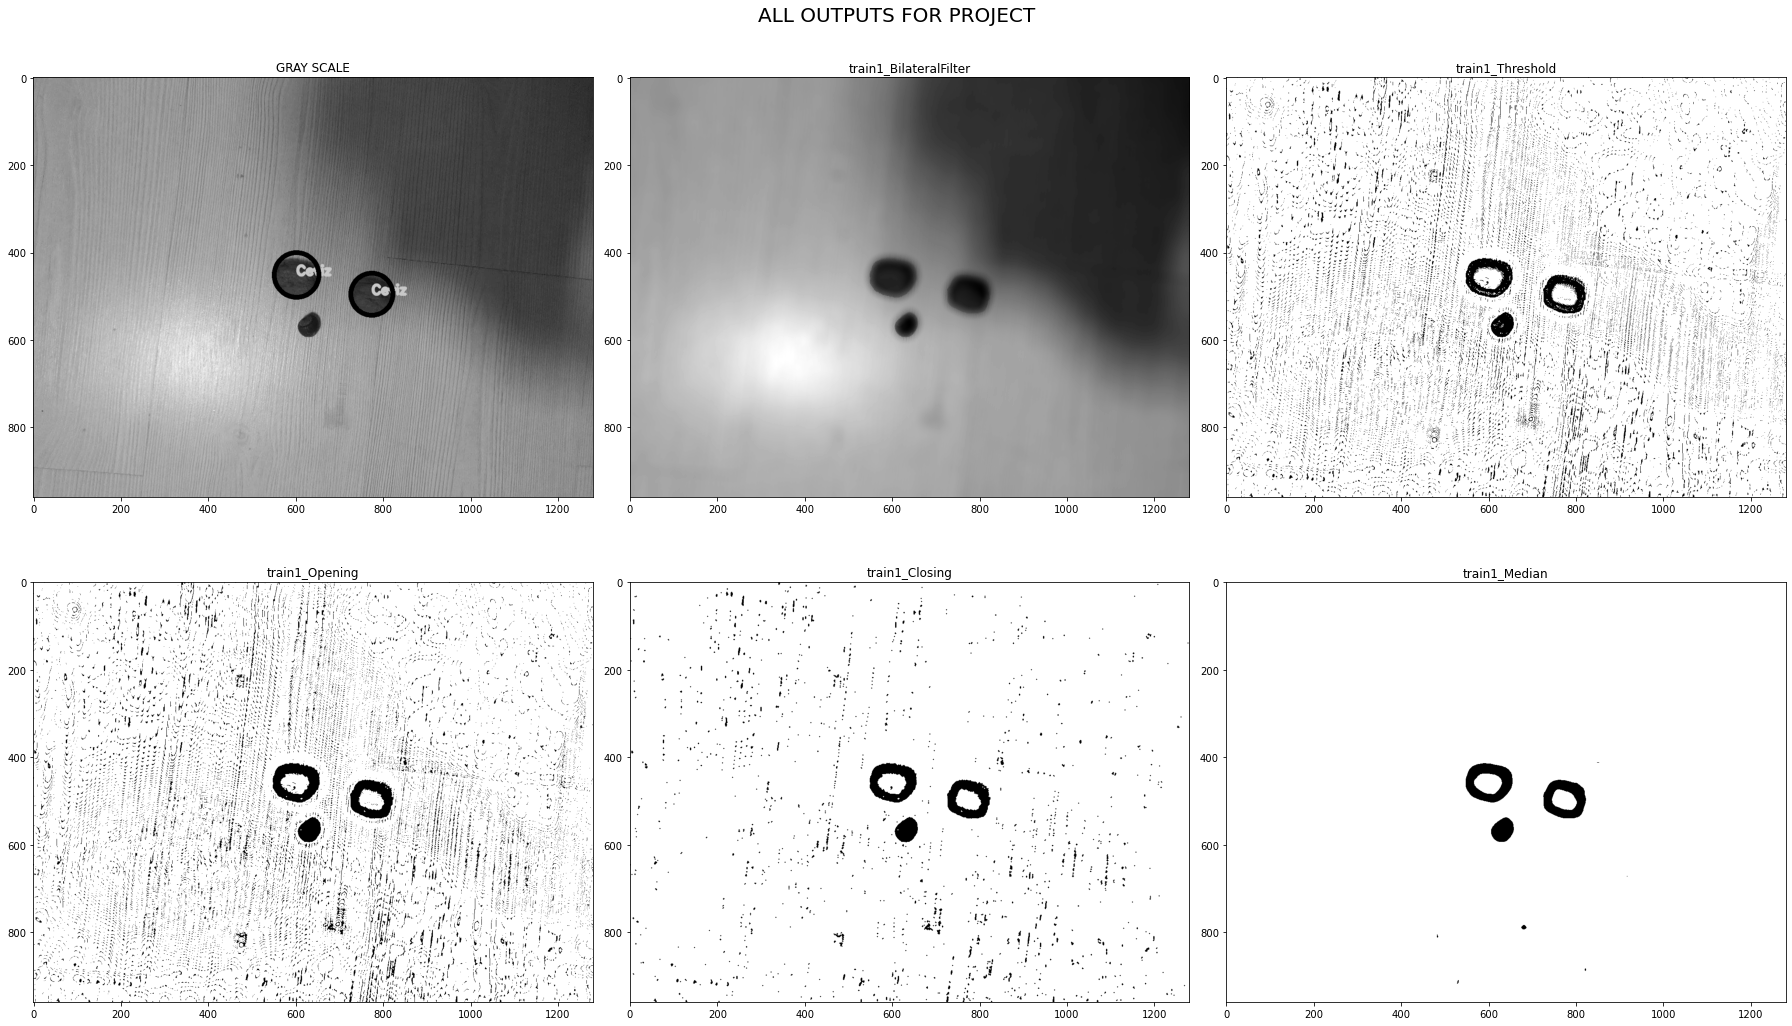

Train-1 görüntüsü icin nesne sayıları:
Ceviz Sayısı: 2
Fındık Sayısı: 0
Leblebi Sayısı: 0


In [20]:
ceviz_t1,fındık_t1,leblebi_t1=Fonksiyon("train1.jpg")


print("Train-1 görüntüsü icin nesne sayıları:")
print("Ceviz Sayısı: " + str(ceviz_t1))
print("Fındık Sayısı: " + str(fındık_t1))
print("Leblebi Sayısı: " + str(leblebi_t1))

Normal Cekim


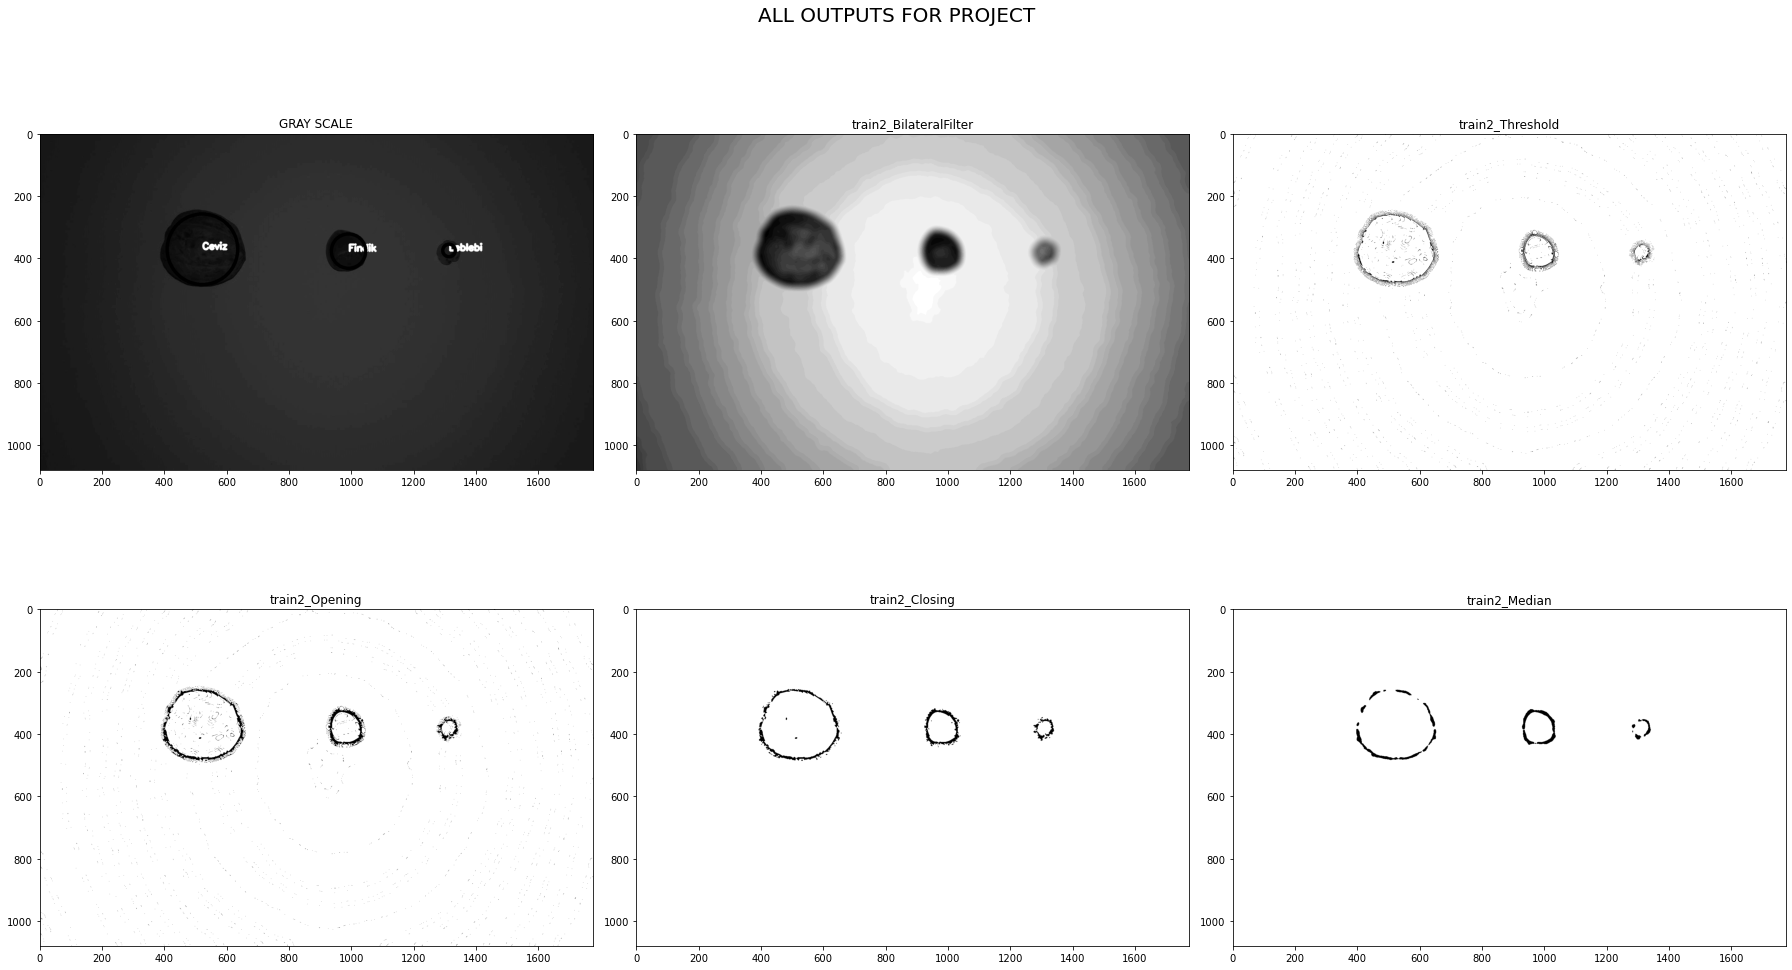

Train-2 görüntüsü icin nesne sayıları:
Ceviz Sayısı: 1
Fındık Sayısı: 1
Leblebi Sayısı: 1


In [21]:
ceviz_t2,fındık_t2,leblebi_t2=Fonksiyon("train2.jpg")


print("Train-2 görüntüsü icin nesne sayıları:")
print("Ceviz Sayısı: " + str(ceviz_t2))
print("Fındık Sayısı: " + str(fındık_t2))
print("Leblebi Sayısı: " + str(leblebi_t2))

Normal Cekim


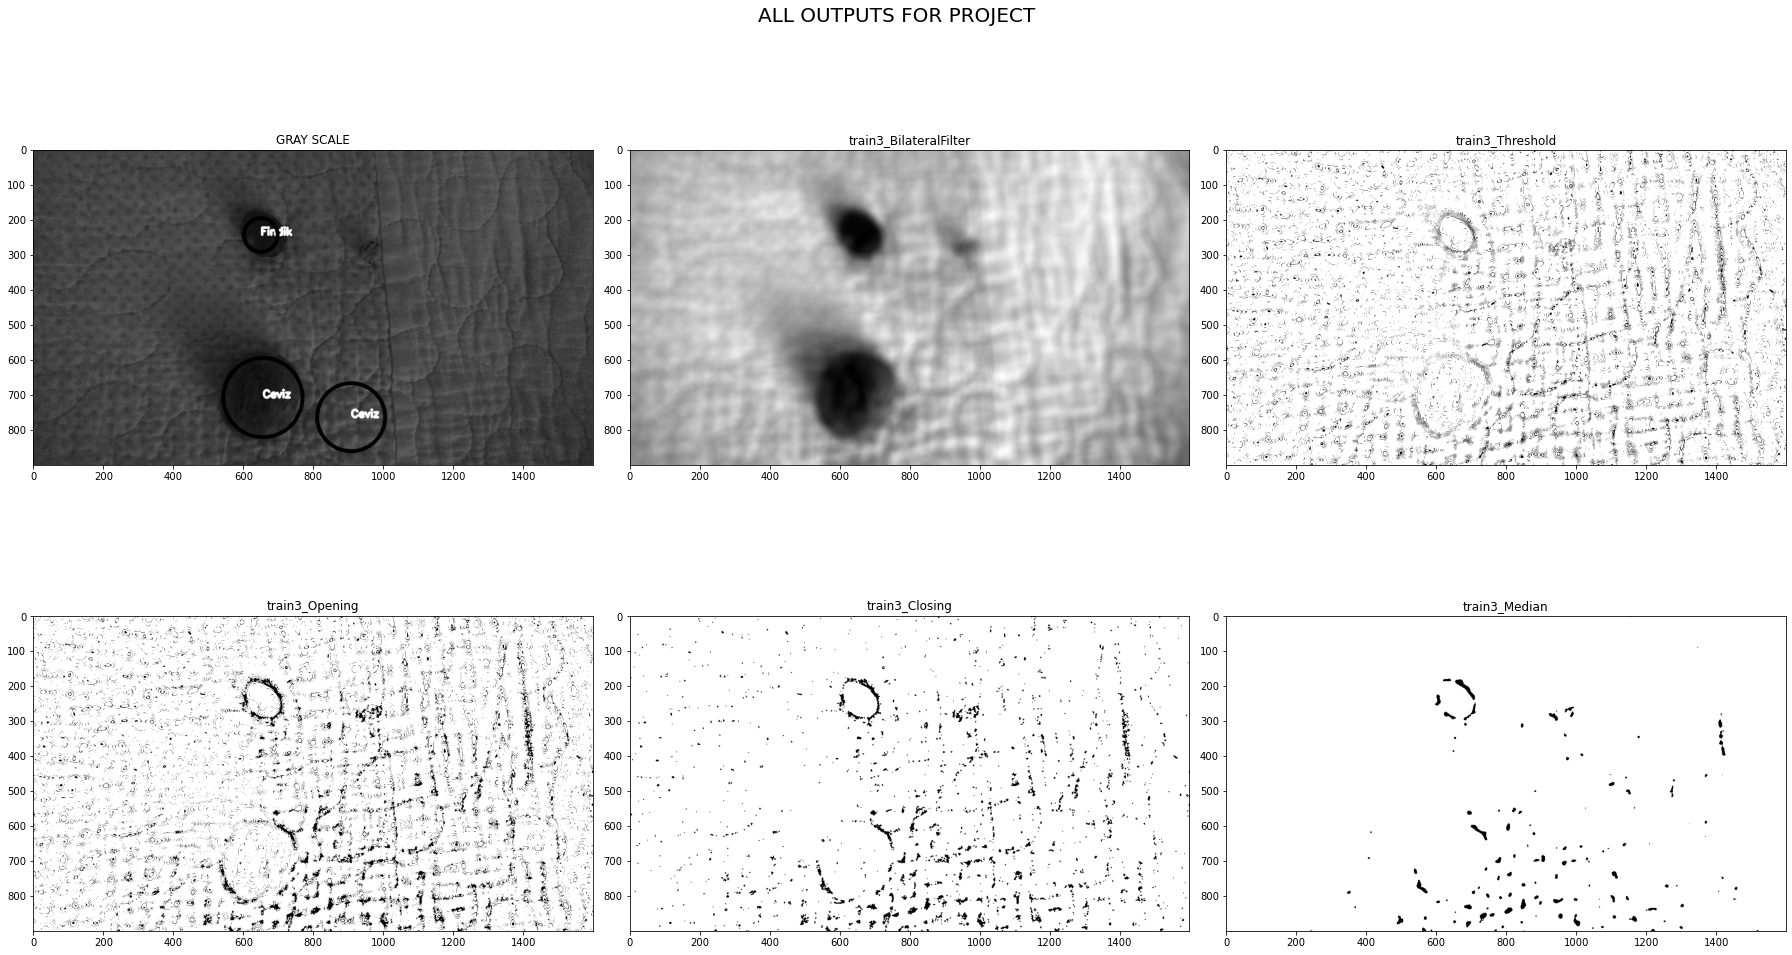

Train-3 görüntüsü icin nesne sayıları:
Ceviz Sayısı: 2
Fındık Sayısı: 1
Leblebi Sayısı: 0


In [22]:
ceviz_t3,fındık_t3,leblebi_t3=Fonksiyon("train3.jpg")

print("Train-3 görüntüsü icin nesne sayıları:")
print("Ceviz Sayısı: " + str(ceviz_t3))
print("Fındık Sayısı: " + str(fındık_t3))
print("Leblebi Sayısı: " + str(leblebi_t3))

Normal Cekim


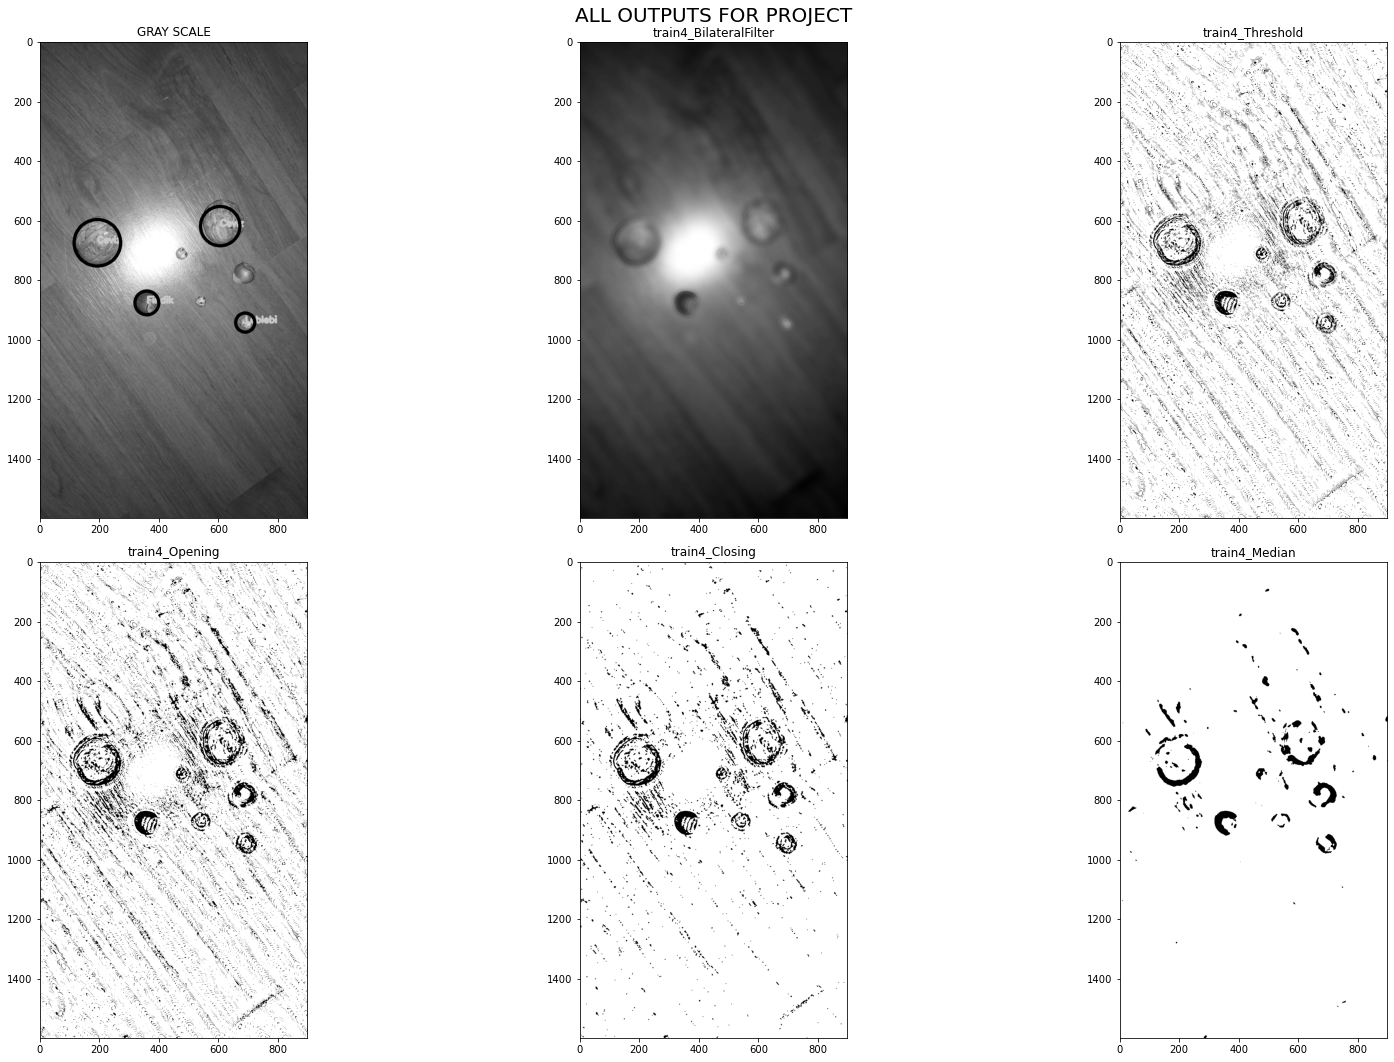

Train-4 görüntüsü icin nesne sayıları:
Ceviz Sayısı: 2
Fındık Sayısı: 1
Leblebi Sayısı: 1


In [23]:
ceviz_t4,fındık_t4,leblebi_t4=Fonksiyon("train4.jpg")

print("Train-4 görüntüsü icin nesne sayıları:")
print("Ceviz Sayısı: " + str(ceviz_t4))
print("Fındık Sayısı: " + str(fındık_t4))
print("Leblebi Sayısı: " + str(leblebi_t4))

Uzaktan Çekim


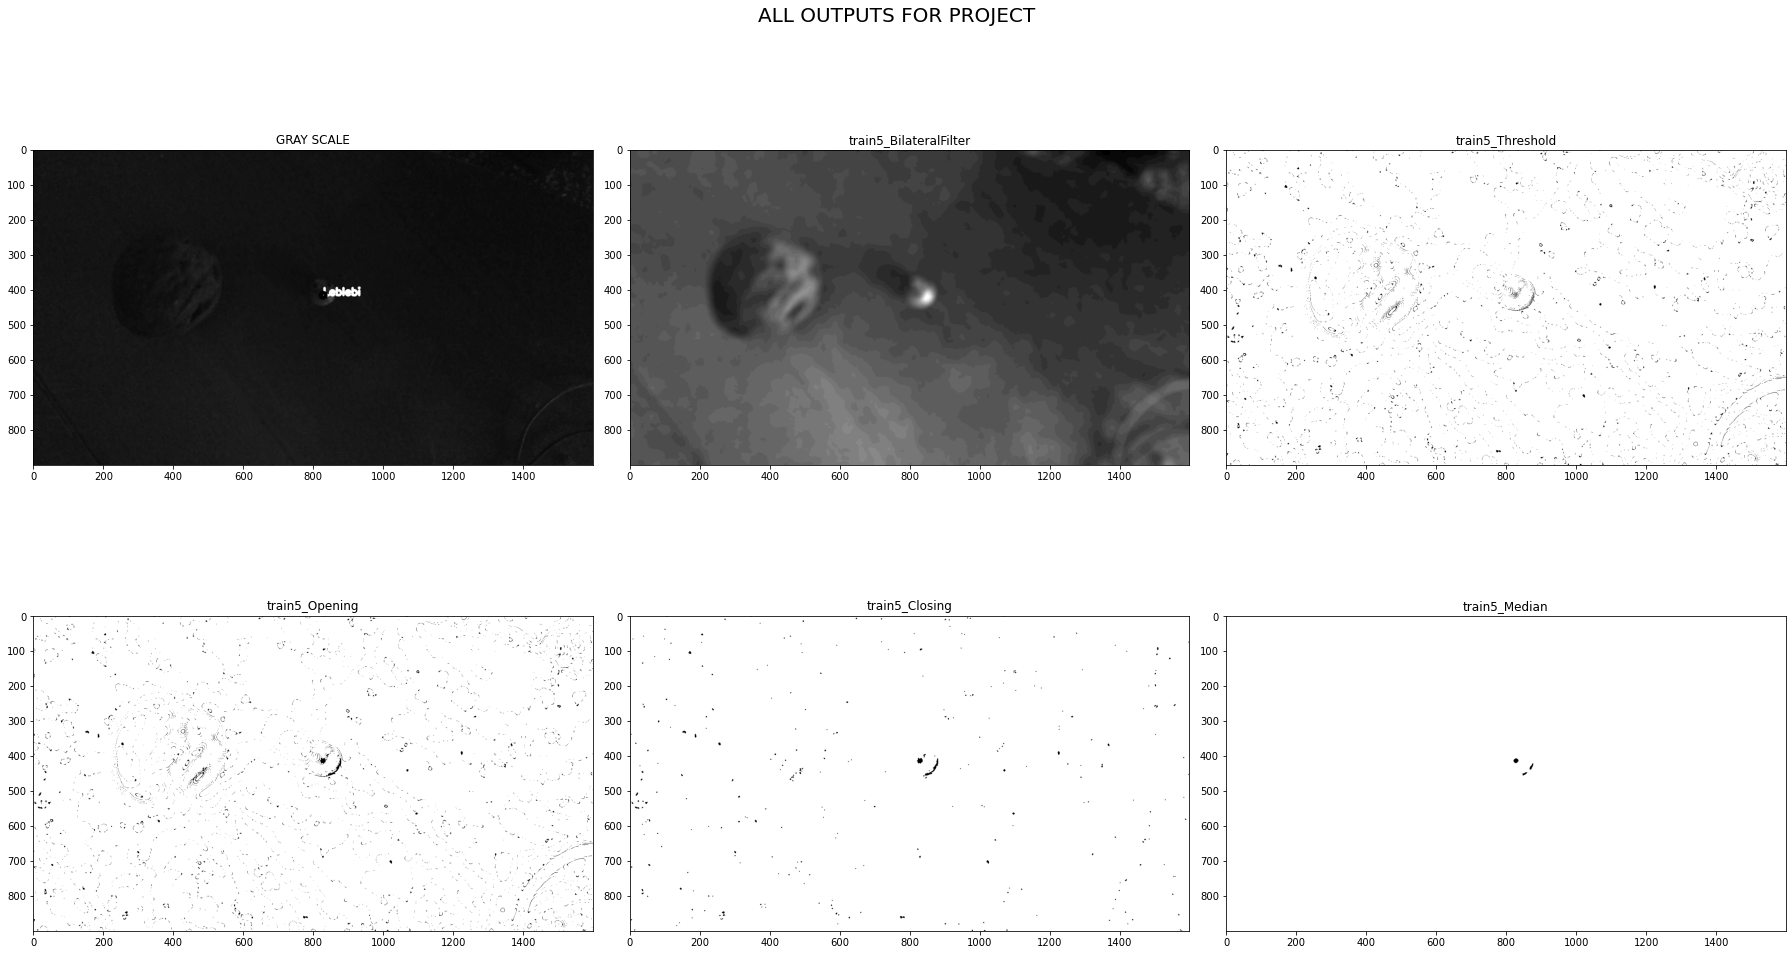

Train-5 görüntüsü icin nesne sayıları:
Ceviz Sayısı: 0
Fındık Sayısı: 0
Leblebi Sayısı: 1


In [24]:
ceviz_t5,fındık_t5,leblebi_t5=Fonksiyon("train5.jpg")

print("Train-5 görüntüsü icin nesne sayıları:")
print("Ceviz Sayısı: " + str(ceviz_t5))
print("Fındık Sayısı: " + str(fındık_t5))
print("Leblebi Sayısı: " + str(leblebi_t5))

Normal Cekim


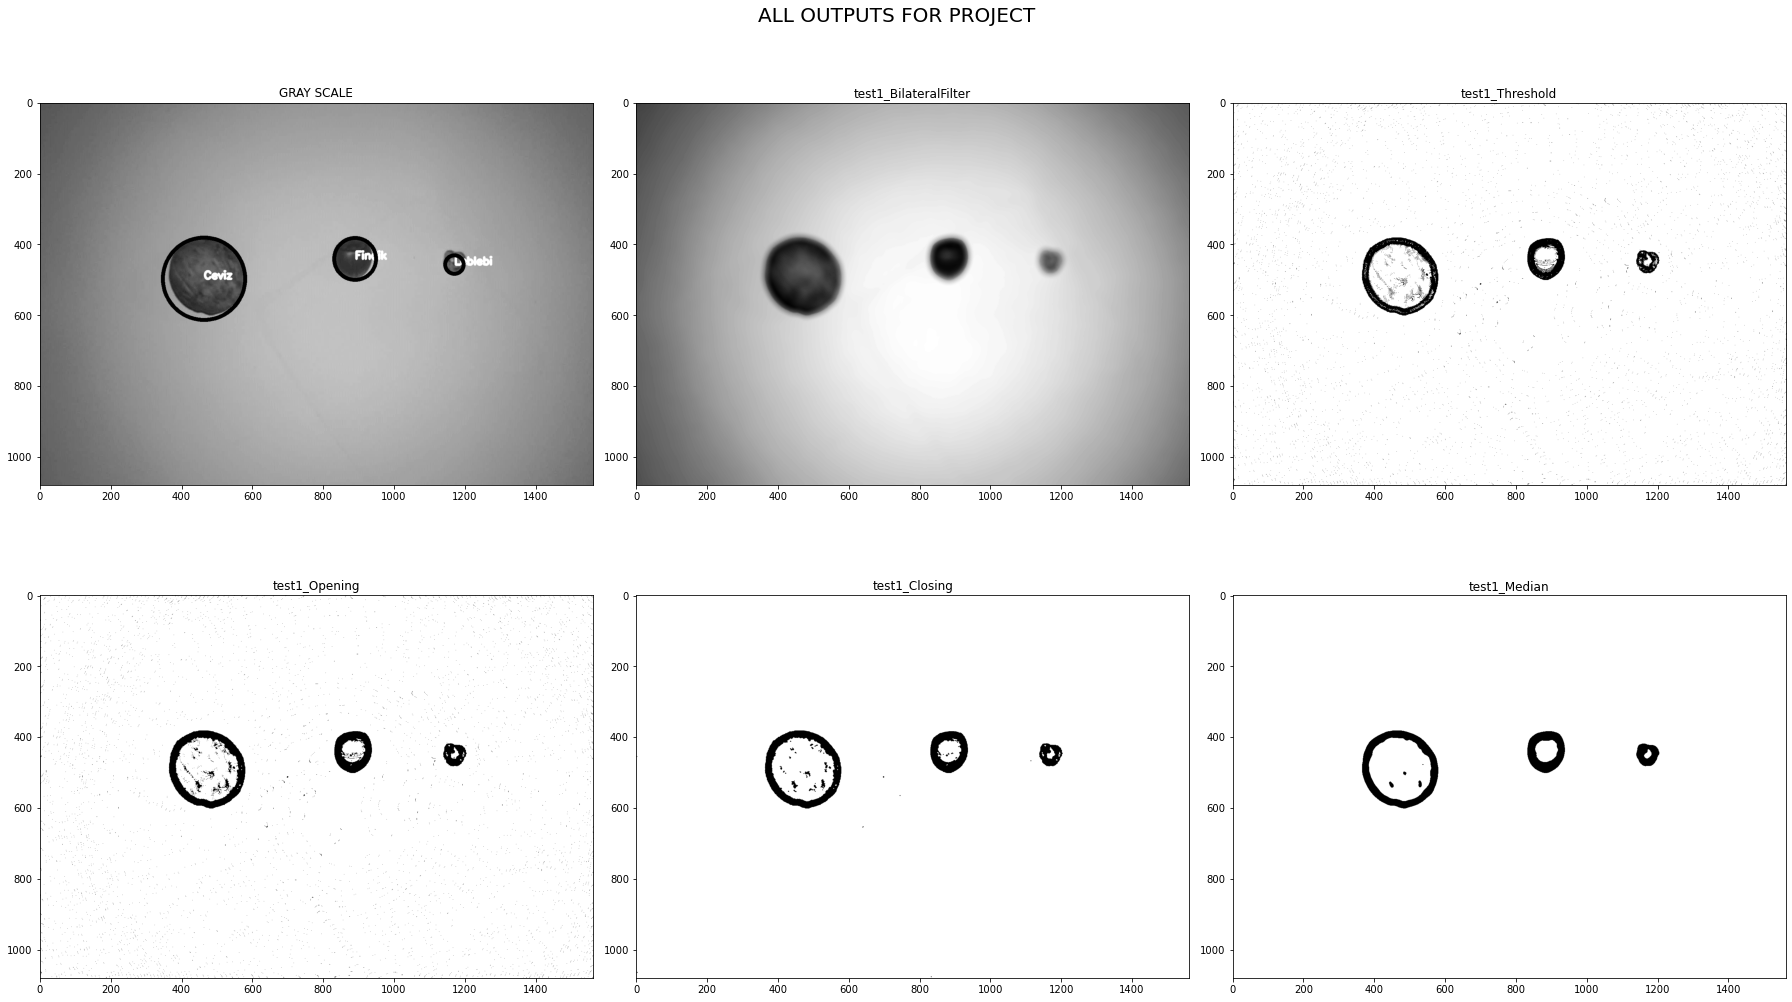

Test-1 görüntüsü icin nesne sayıları:
Ceviz Sayısı: 1
Fındık Sayısı: 1
Leblebi Sayısı: 1


In [25]:
                        ######################### TEST VERİLERİ #######################
ceviz_te1,fındık_te1,leblebi_te1=Fonksiyon("test1.jpg")

print("Test-1 görüntüsü icin nesne sayıları:")
print("Ceviz Sayısı: " + str(ceviz_te1))
print("Fındık Sayısı: " + str(fındık_te1))
print("Leblebi Sayısı: " + str(leblebi_te1))

Normal Cekim


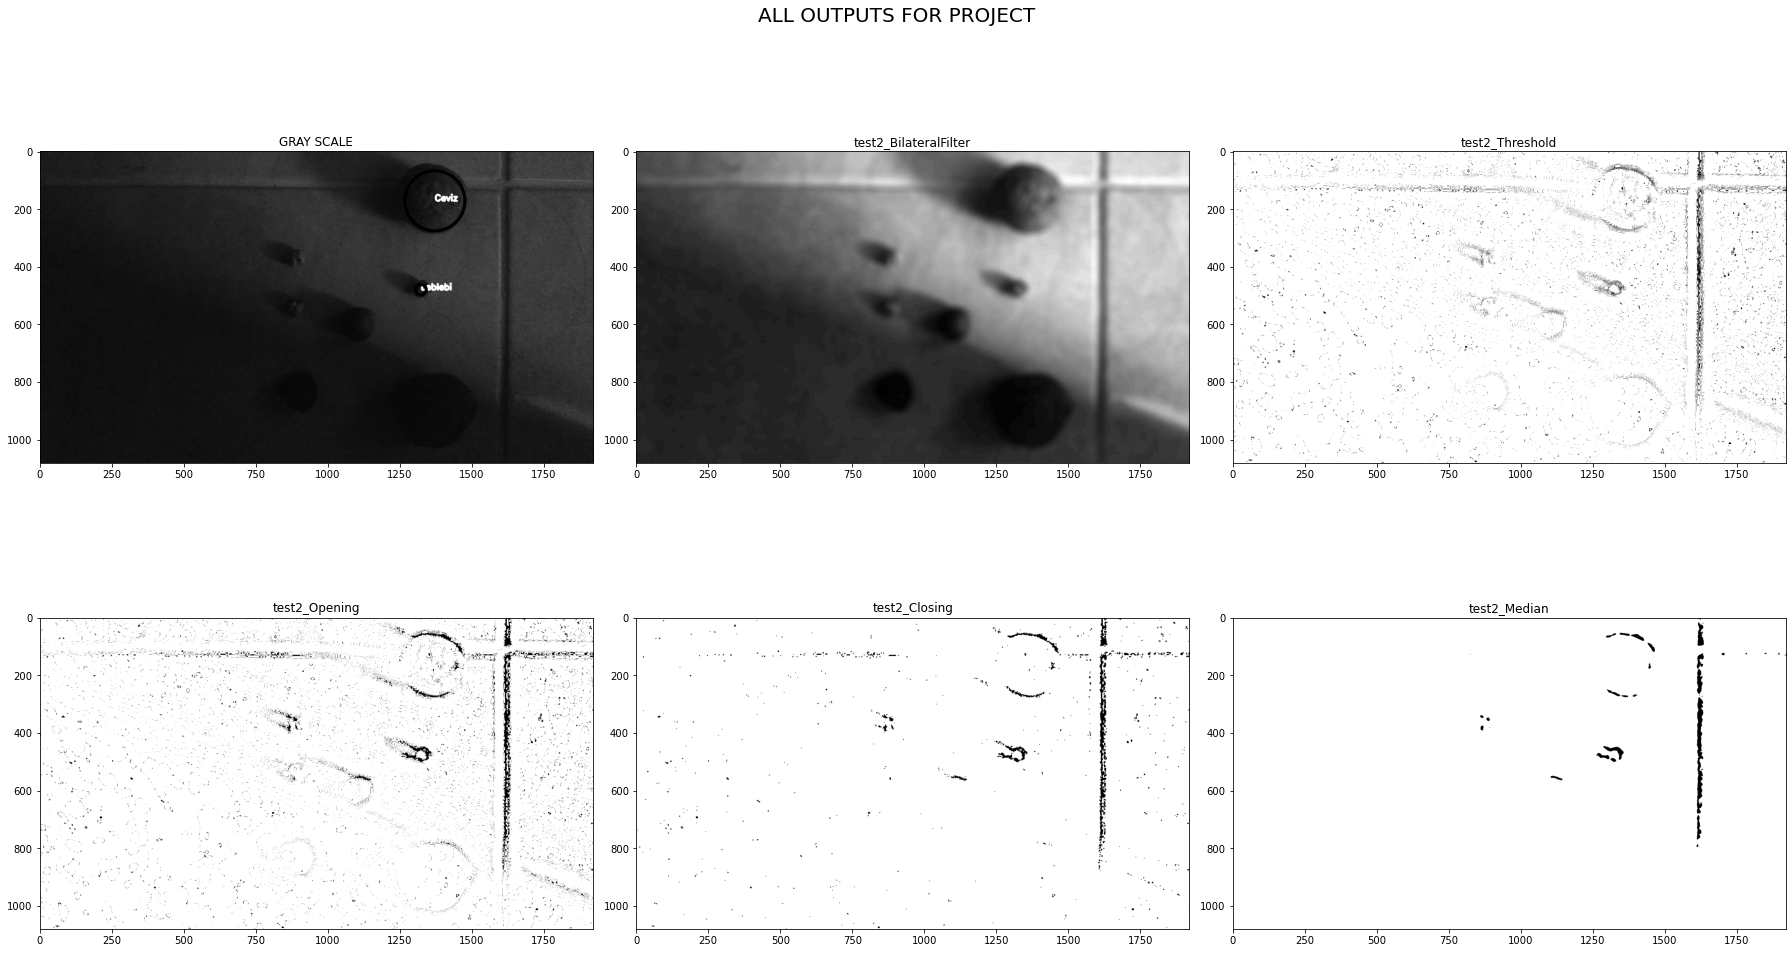

Test-2 görüntüsü icin nesne sayıları:
Ceviz Sayısı: 1
Fındık Sayısı: 0
Leblebi Sayısı: 1


In [26]:
ceviz_te2,fındık_te2,leblebi_te2=Fonksiyon("test2.jpg")

print("Test-2 görüntüsü icin nesne sayıları:")
print("Ceviz Sayısı: " + str(ceviz_te2))
print("Fındık Sayısı: " + str(fındık_te2))
print("Leblebi Sayısı: " + str(leblebi_te2))

Yakından çekim


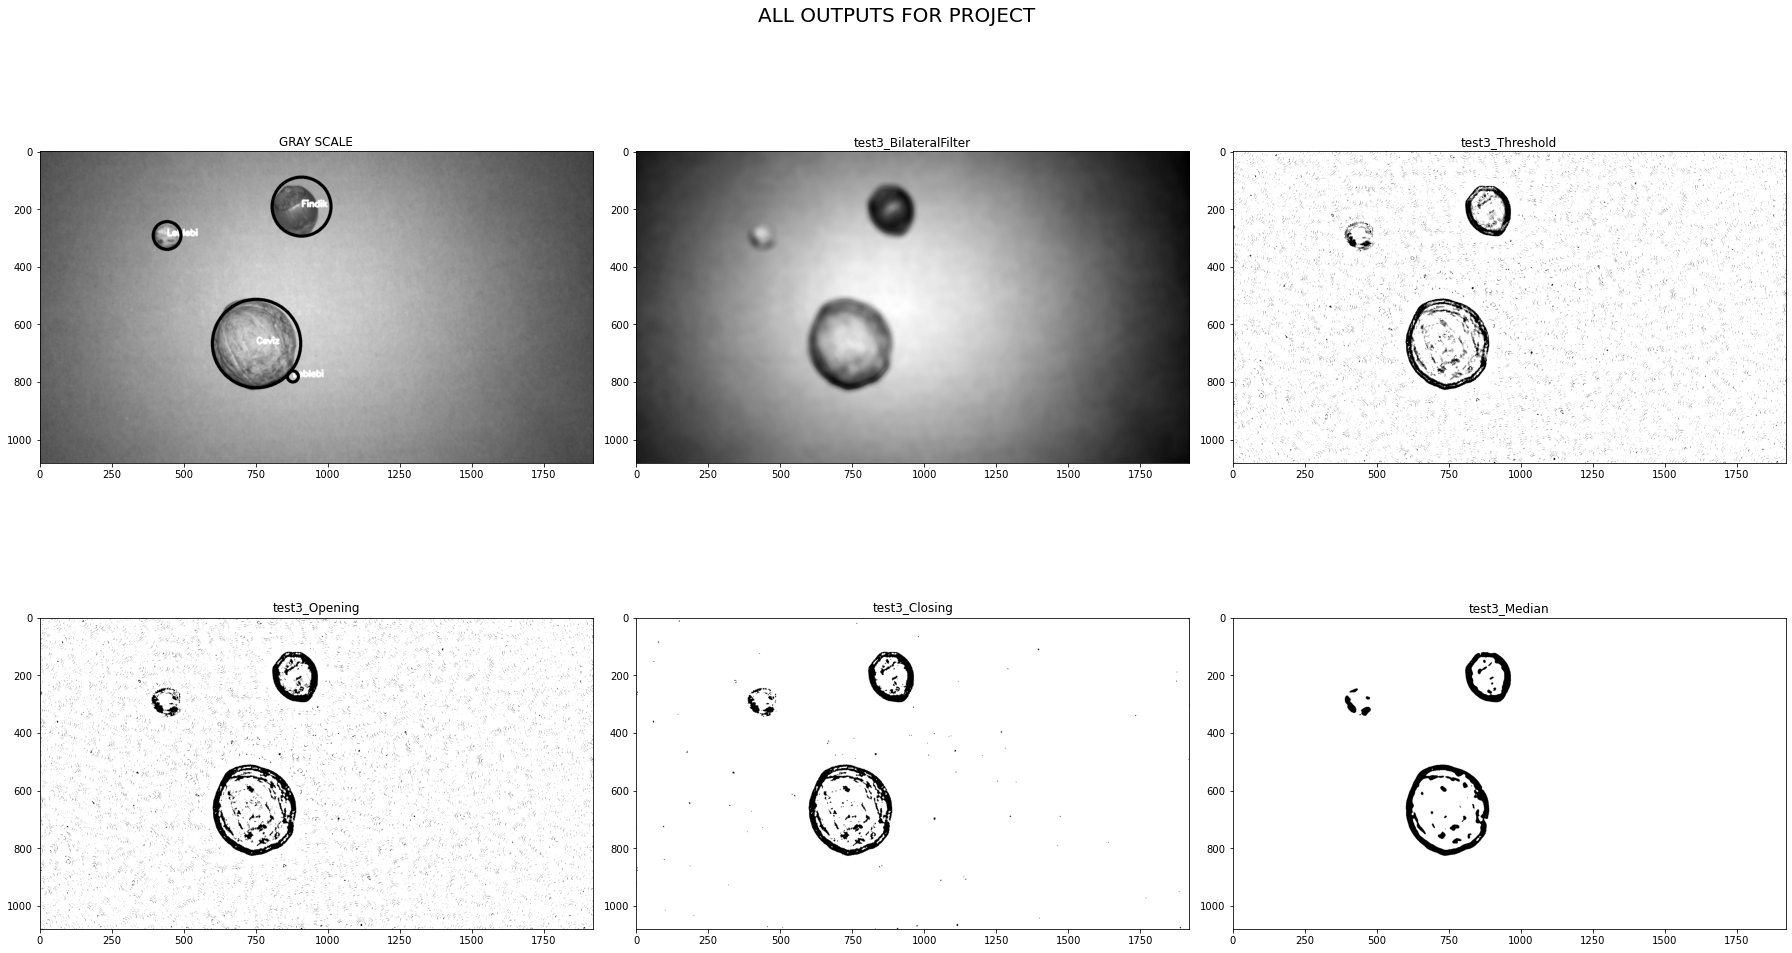

Test-3 görüntüsü icin nesne sayıları:
Ceviz Sayısı: 1
Fındık Sayısı: 1
Leblebi Sayısı: 2


In [27]:
ceviz_te3,fındık_te3,leblebi_te3=Fonksiyon("test3.jpg")

print("Test-3 görüntüsü icin nesne sayıları:")
print("Ceviz Sayısı: " + str(ceviz_te3))
print("Fındık Sayısı: " + str(fındık_te3))
print("Leblebi Sayısı: " + str(leblebi_te3))

Normal Cekim


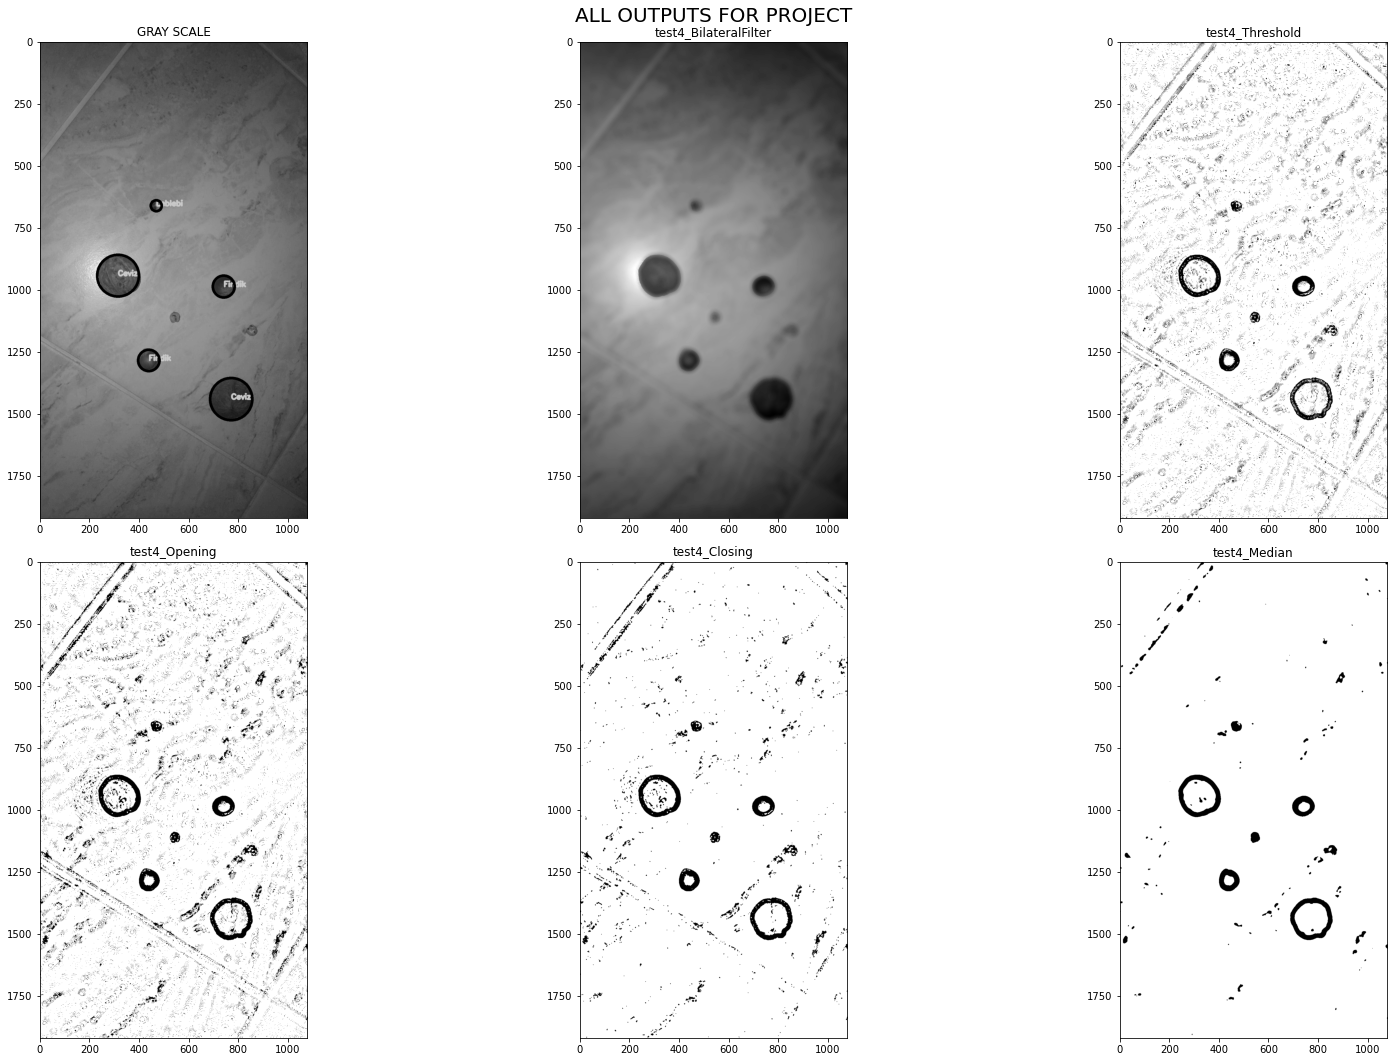

Test-4 görüntüsü icin nesne sayıları:
Ceviz Sayısı: 2
Fındık Sayısı: 2
Leblebi Sayısı: 1


In [28]:
ceviz_te4,fındık_te4,leblebi_te4=Fonksiyon("test4.jpg")

print("Test-4 görüntüsü icin nesne sayıları:")
print("Ceviz Sayısı: " + str(ceviz_te4))
print("Fındık Sayısı: " + str(fındık_te4))
print("Leblebi Sayısı: " + str(leblebi_te4))

Normal Cekim


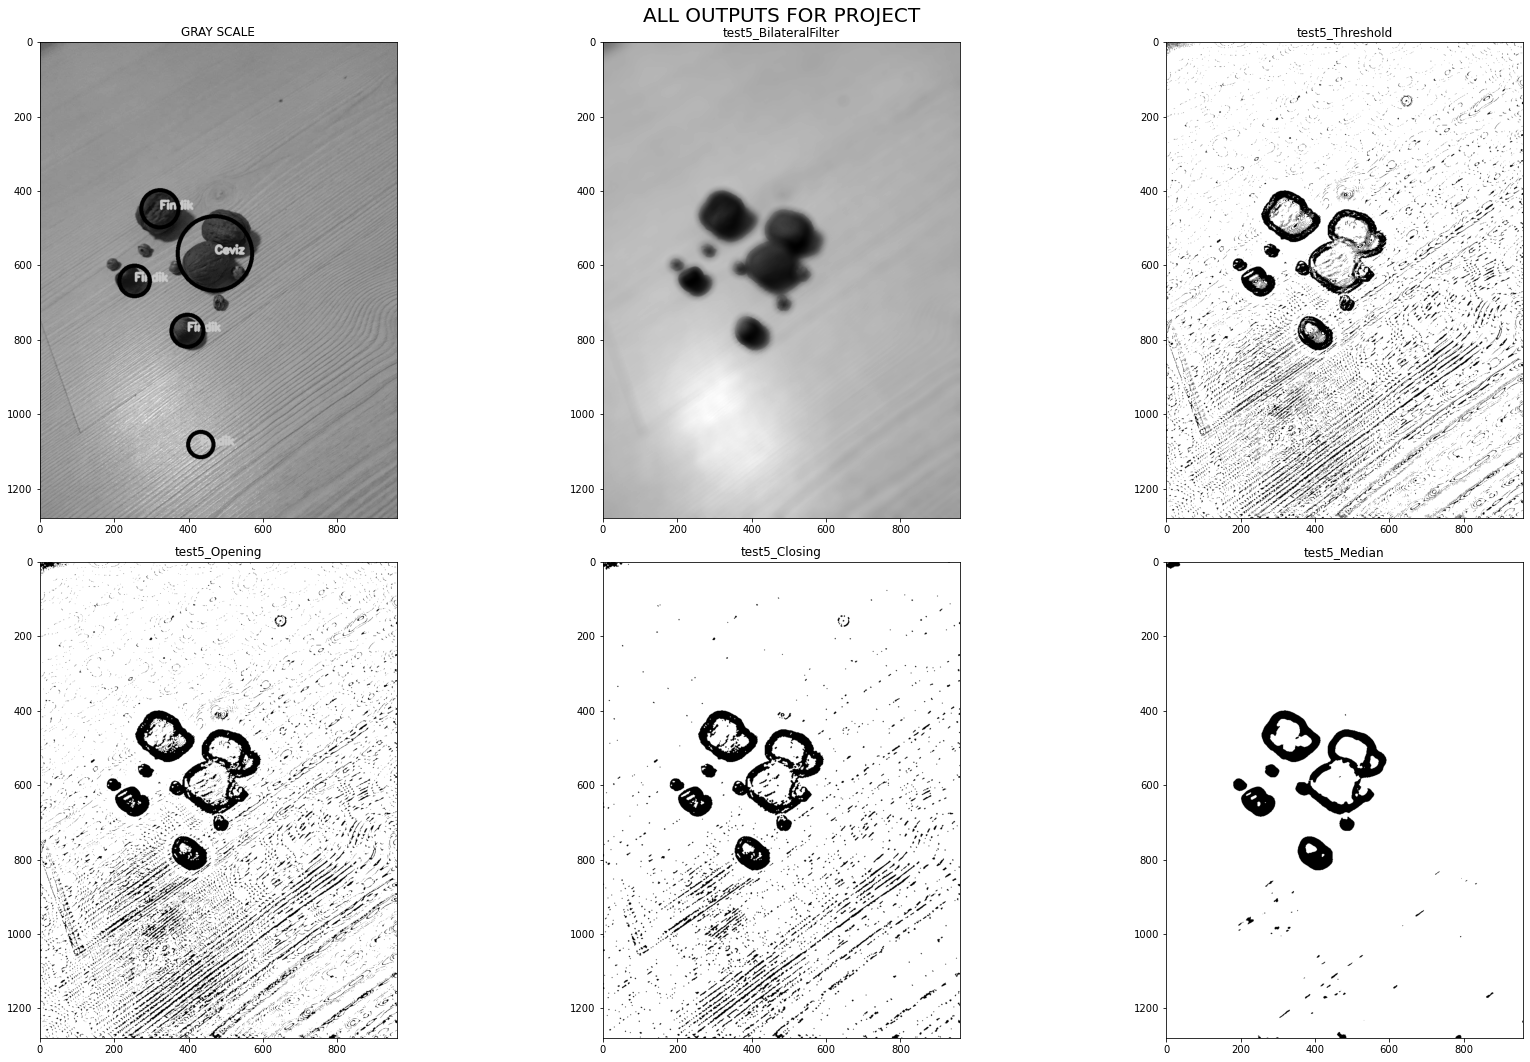

Test-5 görüntüsü icin nesne sayıları:
Ceviz Sayısı: 1
Fındık Sayısı: 4
Leblebi Sayısı: 0


In [29]:
ceviz_te5,fındık_te5,leblebi_te5=Fonksiyon("test5.jpg")

print("Test-5 görüntüsü icin nesne sayıları:")
print("Ceviz Sayısı: " + str(ceviz_te5))
print("Fındık Sayısı: " + str(fındık_te5))
print("Leblebi Sayısı: " + str(leblebi_te5))

Uzaktan Çekim


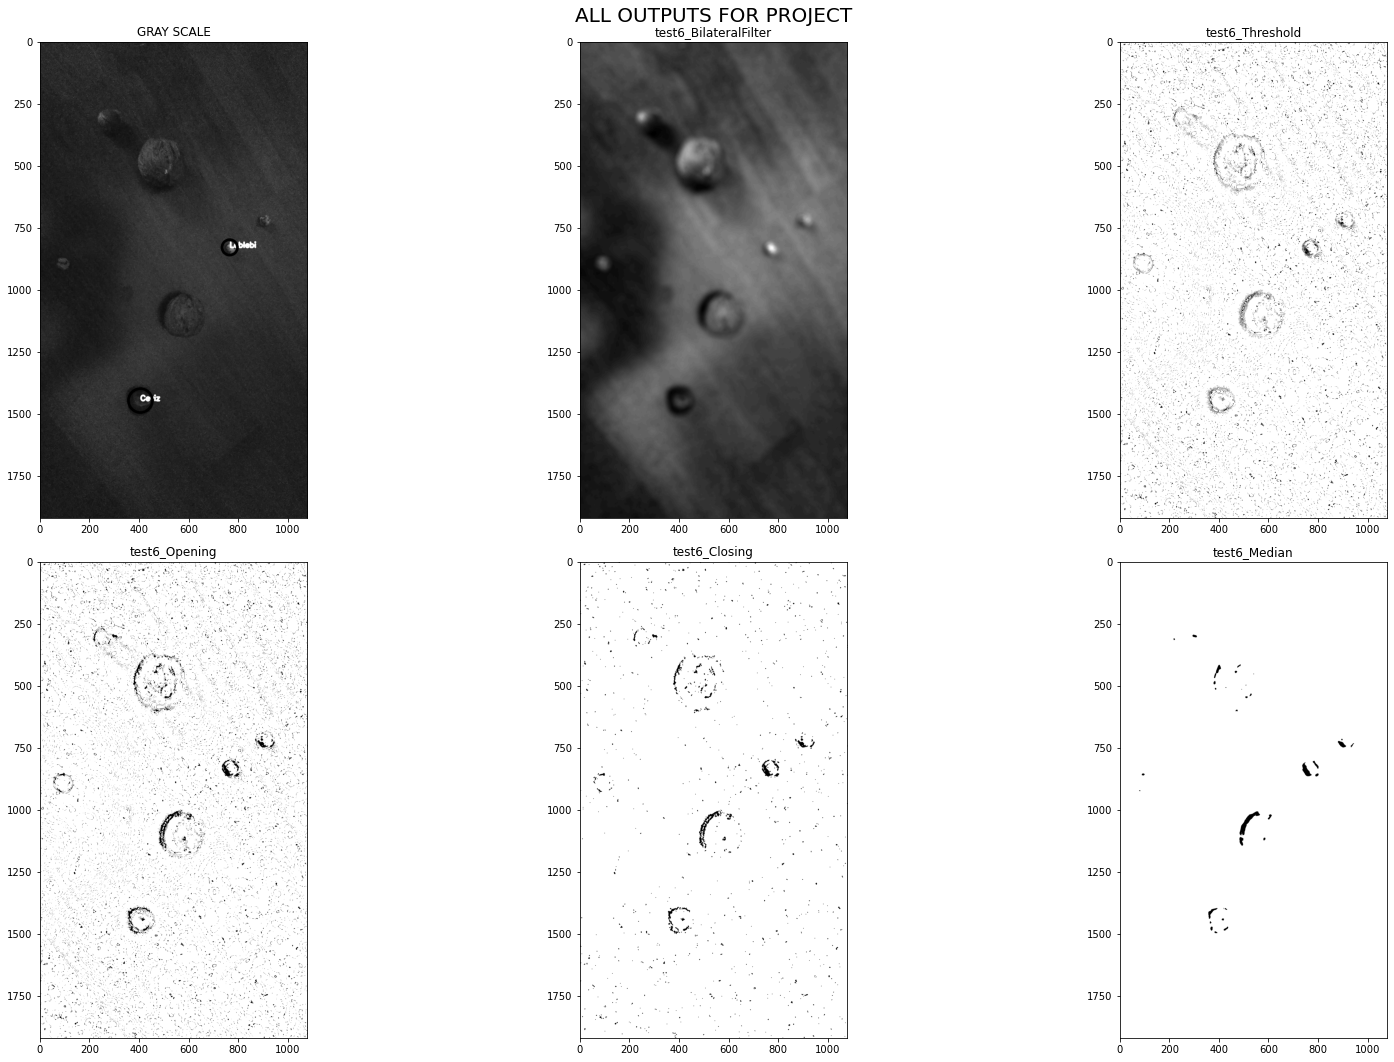

Test-6 görüntüsü icin nesne sayıları:
Ceviz Sayısı: 1
Fındık Sayısı: 0
Leblebi Sayısı: 1


In [30]:
ceviz_te6,fındık_te6,leblebi_te6=Fonksiyon("test6.jpg")

print("Test-6 görüntüsü icin nesne sayıları:")
print("Ceviz Sayısı: " + str(ceviz_te6))
print("Fındık Sayısı: " + str(fındık_te6))
print("Leblebi Sayısı: " + str(leblebi_te6))